# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [1]:
!ls


Dataset_TWO_Dogs_Rosa_Kettumaki.ipynb
NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx
boro_population.csv
zipcodes-neighborhoods.csv


## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [2]:
!pip install --quiet pandas 


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
import pandas as pd

df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [3]:
df.describe()

,Owner Zip Code,Animal Birth,Application Date,License Issued Date,License Expired Date
count,81937.000000,81937,81937,81937,81937
mean,10670.466993,2010-01-12 20:58:10.467066368,2015-10-14 12:41:10.459451904,2015-10-12 09:22:19.834263040,2017-01-24 07:05:10.760706304
min,1003.000000,1981-04-01 00:00:00,2012-09-19 16:01:19.647000,2014-09-12 00:00:00,2016-04-29 00:00:00
25%,10029.000000,2007-01-01 00:00:00,2015-07-15 14:20:51.892999936,2015-07-13 00:00:00,2016-08-08 00:00:00
50%,10463.000000,2010-08-01 00:00:00,2015-10-16 09:03:27.616999936,2015-10-14 00:00:00,2016-11-14 00:00:00
75%,11228.000000,2013-08-01 00:00:00,2016-01-26 15:24:30.927000064,2016-01-25 00:00:00,2017-03-15 00:00:00
max,93036.000000,2016-04-01 00:00:00,2016-04-28 15:19:47.843000,2016-04-28 00:00:00,2022-03-29 00:00:00
std,745.422814,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81937 entries, 0 to 81936
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          81937 non-null  int64         
 1   Animal Name             81738 non-null  object        
 2   Animal Gender           81937 non-null  object        
 3   Primary Breed           81937 non-null  object        
 4   Secondary Breed         10547 non-null  object        
 5   Animal Dominant Color   81608 non-null  object        
 6   Animal Secondary Color  56919 non-null  object        
 7   Animal Third Color      17641 non-null  object        
 8   Animal Birth            81937 non-null  datetime64[ns]
 9   Spayed or Neut          81937 non-null  object        
 10  Guard or Trained        49576 non-null  object        
 11  Vaccinated              81937 non-null  object        
 12  Application Date        81937 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [ ]:
# This is a dataset about the  dogs in the New York City.
# Each row is one dog.
# Then there are 15 colums 

#0   Owner Zip Code          - The owners zip code like 10024      
#1   Animal Name             - Name of the Dog Name, like: Indie Zephir, Bilal, Buddy        
#2   Animal Gender           - The Dog's gender: M / F   
#3   Primary Breed           - The Dog's Primary Breed, like: "Rottweiler, Australian Cattledog or Basenji"
#4   Secondary Breed         - The Dog's Secondary Breed           
#5   Animal Dominant Color   - The Dog's Dominant Color like: "BROWN, BLACK, Charcoal"  
#6   Animal Secondary Color  - The Dog's Secondary Color   
#7   Animal Third Color      - The Dog's Third Color       
#8   Animal Birth            - The Dog's  Birth date like "2007-11-01"
#9   Spayed or Neut          - Spayed or Neut "Yes / No"        
#10  Guard or Trained        - Guard or Trained "No, Yes, NaN"     
#11  Vaccinated              - Vaccinated "Yes/No"    
#12  Application Date        - Date, like: 2012-09-19 16:01:19.647
#13  License Issued Date     - Date like: 2015-09-19
#14  License Expired Date    - Date like: 2016-09-19

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
#1 Is there a difference in popular dog breeds among different NYC neighborhoods? How has this changed over the time period covered by the dataset?

#2 Which neighborhood has the highest percentage of unvaccinated dogs? How has this changed over the time period covered by the dataset?

#3 What are the breeds and ages of dogs in the "guard or trained" category? How has this changed over the time period covered by the dataset?

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

In [58]:
df['Primary Breed'].head(10)

0                                 Unknown
1                              Rottweiler
2                    Australian Cattledog
3                                 Unknown
4                                 Basenji
5                        Akita Crossbreed
6    American Pit Bull Mix / Pit Bull Mix
7                                   Boxer
8           Labrador Retriever Crossbreed
9                                 Unknown
Name: Primary Breed, dtype: object

In [68]:
df['Primary Breed'].value_counts().head(10)

Primary Breed
Unknown                                 12894
Yorkshire Terrier                        5133
Shih Tzu                                 4727
Chihuahua                                3924
Maltese                                  2965
Labrador Retriever                       2872
American Pit Bull Terrier/Pit Bull       2153
American Pit Bull Mix / Pit Bull Mix     2029
Labrador Retriever Crossbreed            1864
Beagle                                   1438
Name: count, dtype: int64

In [71]:
df['Primary Breed'].value_counts().head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
66758,11211,unknown,F,Yorkshire Terrier Crossbreed,NaN,Brown,Black,NaN,2013-08-01,Yes,NaN,Yes,2016-02-20 18:27:39.247,2016-02-20,2017-02-20
25404,11215,Jojo,M,Yorkshire Terrier Crossbreed,NaN,Tan,Black,NaN,2015-01-01,Yes,NaN,Yes,2015-08-05 07:00:08.587,2015-08-05,2020-08-05
78013,11221,Teddy,M,Yorkshire Terrier Crossbreed,NaN,Tan,White,NaN,2014-09-01,Yes,NaN,Yes,2016-04-12 12:13:28.983,2016-04-12,2017-04-12
20415,10458,Akamaro,M,Yorkshire Terrier Crossbreed,NaN,Black,White,NaN,2015-04-01,No,NaN,No,2015-07-15 10:31:51.290,2015-07-15,2016-07-15
43991,11105,Dog Name Not Provided,F,Yorkshire Terrier Crossbreed,NaN,Black,NaN,NaN,2015-07-01,No,NaN,No,2015-10-28 11:07:22.367,2015-10-28,2016-10-28
48678,11238,Cece Smith,F,Yorkshire Terrier Crossbreed,NaN,White,Gray,Cream,2000-09-01,Yes,NaN,Yes,2015-11-19 15:37:12.407,2015-11-19,2020-11-19
43995,11377,Dog Name Not Provided,F,Yorkshire Terrier Crossbreed,NaN,Cream,Tan,NaN,2015-07-01,No,NaN,No,2015-10-28 11:12:06.877,2015-10-28,2016-10-28
64526,10003,CODY,M,Yorkshire Terrier Crossbreed,NaN,Black,Gold,NaN,2015-10-01,No,NaN,No,2016-02-09 18:18:33.467,2016-02-09,2017-02-09
69514,11207,Loki,F,Yorkshire Terrier Crossbreed,NaN,Tan,Tan,Black,2014-11-01,Yes,NaN,Yes,2016-03-04 19:35:29.157,2016-03-04,2017-03-10
72644,10036,UNKNOWN,F,Yorkshire Terrier Crossbreed,NaN,Black,White,NaN,2015-11-01,No,NaN,No,2016-03-18 18:10:17.640,2016-03-18,2017-03-18


In [78]:
# I admit, for this I asked help from Chat GPT since I was stuck and there were no one to help me at the moment. 
df['Primary Breed'][df['Primary Breed'] != 'Unknown'].value_counts().head(10)

Primary Breed
Yorkshire Terrier                       5133
Shih Tzu                                4727
Chihuahua                               3924
Maltese                                 2965
Labrador Retriever                      2872
American Pit Bull Terrier/Pit Bull      2153
American Pit Bull Mix / Pit Bull Mix    2029
Labrador Retriever Crossbreed           1864
Beagle                                  1438
Pomeranian                              1422
Name: count, dtype: int64

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

<Axes: >

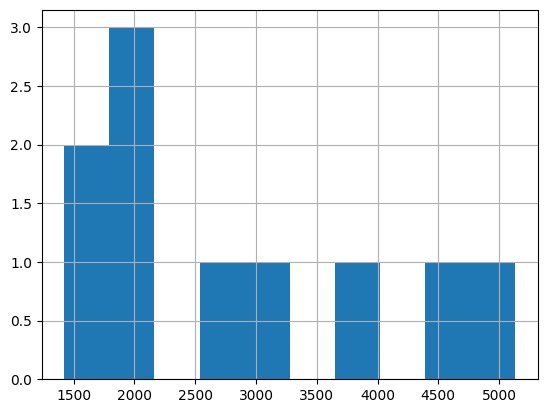

In [79]:
df['Primary Breed'][df['Primary Breed'] != 'Unknown'].value_counts().head(10).hist()

In [48]:
df['Primary Breed'].value_counts()

Primary Breed
Unknown                         12894
Yorkshire Terrier                5133
Shih Tzu                         4727
Chihuahua                        3924
Maltese                          2965
                                ...  
Bracco Italiano                     1
Swedish Vallhund                    1
Grand Basset Griffon Vendeen        1
Hamiltonstovare                     1
Lancashire Heeler                   1
Name: count, Length: 279, dtype: int64

In [51]:
df.groupby('Primary Breed').head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80820,11204,NaN,M,Siberian Husky Crossbreed,NaN,Black,White,NaN,2016-01-01,Yes,NaN,No,2016-04-24 18:23:25.647,2016-04-24,2017-04-24
81290,11234,Chi Chi,F,"Bull Dog, American",NaN,White,Black,NaN,2015-01-01,Yes,NaN,No,2016-04-25 19:24:24.990,2016-04-25,2017-04-25
81316,11226,Praline,F,Gordon Setter,NaN,BLACK,TAN,NaN,2012-12-01,Yes,No,Yes,2016-04-25 21:09:58.110,2016-04-25,2017-06-15
81370,11385,Gigi,F,Saluki,NaN,Black,Brown,White,2006-03-01,Yes,NaN,Yes,2016-04-26 08:18:35.773,2016-04-26,2017-03-25


## What are the most popular dog names?

In [83]:
df['Animal Name'].info

<bound method Series.info of 0            BLUE MACK
1         Indie Zephir
2                Bilal
3                Buddy
4                  Ali
             ...      
81932    Cheeseburger 
81933             Jack
81934          Petunia
81935              Max
81936           Sirius
Name: Animal Name, Length: 81937, dtype: object>

In [112]:
df.groupby('Animal Name').head(10)

TypeError: '<' not supported between instances of 'datetime.datetime' and 'int'

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [94]:
df[df['Animal Name'] == 'Rosa']
# There are three dogs called Rosa. 

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
623,10011,Rosa,F,Dachshund Smooth Coat,NaN,Tan,Black,NaN,2013-09-01,Yes,NaN,Yes,2014-10-25 13:28:14.013,2014-10-25,2017-10-25
12218,11223,Rosa,F,Unknown,Poodle Mix,BLACK,NaN,NaN,2011-10-01,Yes,No,Yes,2015-06-11 16:48:41.487,2015-06-11,2016-06-27
34099,10009,Rosa,F,Jack Russell Terrier,NaN,White,NaN,NaN,2012-09-01,Yes,NaN,Yes,2015-09-09 14:48:46.277,2015-09-09,2016-09-09
47463,11385,Rosa,F,"Welsh Corgi, Pembroke",NaN,Tan,White,NaN,2014-05-01,No,NaN,Yes,2015-11-14 19:03:20.373,2015-11-14,2016-10-17


In [100]:
df[df['Animal Name'] == 'Max']
# There are 515 dogs called Max. 

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
42,10023,Max,M,"Dachshund, Long Haired",NaN,Rust,NaN,NaN,2005-10-01,Yes,NaN,Yes,2014-09-14 21:58:06.647,2014-09-14,2019-09-14
53,10029,Max,M,American Pit Bull Mix / Pit Bull Mix,NaN,BROWN,WHITE,NaN,2008-01-01,Yes,No,Yes,2014-09-15 11:57:08.213,2014-09-15,2017-10-24
128,11218,Max,M,Unknown,Maltese Mix,BLACK,BROWN,NaN,2010-05-01,Yes,No,Yes,2014-09-19 12:28:04.970,2014-09-19,2017-10-25
174,11361,Max,M,West High White Terrier,NaN,WHITE,NaN,NaN,2005-12-01,Yes,No,Yes,2014-09-22 19:17:36.487,2014-09-22,2016-09-24
425,10075,Max,M,Unknown,Dachshund,BRINDLE,NaN,NaN,2012-04-01,Yes,No,Yes,2014-10-11 14:45:43.860,2014-10-11,2016-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81608,10023,Max,M,"Schnauzer, Miniature",NaN,BLACK,SILVER,NaN,2013-02-01,No,No,Yes,2016-04-27 09:14:44.943,2016-04-27,2017-06-09
81643,11372,Max,M,"Schnauzer, Standard",NaN,WHITE,GRAY,NaN,2006-11-01,No,No,Yes,2016-04-27 10:14:57.537,2016-04-27,2017-02-22
81677,11207,Max,M,Papillon,NaN,White,Brown,NaN,2009-04-01,Yes,NaN,Yes,2016-04-27 11:43:13.923,2016-04-27,2017-04-06
81805,11106,Max,M,Jack Russell Terrier,NaN,White,Red,NaN,2015-08-01,Yes,NaN,Yes,2016-04-27 20:18:30.060,2016-04-27,2021-04-27


In [101]:
df[df['Animal Name'] == 'Maxwell']

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
1433,10012,Maxwell,M,Cocker Spaniel,NaN,White,Gray,Black,2014-01-01,Yes,NaN,Yes,2014-12-21 10:32:07.560,2014-12-21,2019-12-21
4045,11236,Maxwell,M,Maltese,NaN,WHITE,NaN,NaN,2012-11-01,No,No,Yes,2015-04-20 16:04:48.143,2015-04-20,2016-05-10
11989,11417,Maxwell,M,Maltese,NaN,White,NaN,NaN,2008-12-01,Yes,NaN,Yes,2015-06-10 20:33:47.387,2015-06-10,2016-06-10
17922,10310,Maxwell,M,Basset Hound,NaN,Black,White,NaN,2015-04-01,Yes,NaN,No,2015-07-03 12:02:52.947,2015-07-03,2016-07-03
20307,10303,Maxwell,M,Bichon Frise,NaN,TAN,WHITE,NaN,2013-01-01,Yes,No,Yes,2015-07-14 16:35:35.347,2015-07-14,2016-08-01
22178,10028,Maxwell,M,Bassett Hound,NaN,RED,WHITE,NaN,2014-02-01,Yes,No,Yes,2015-07-23 10:13:49.767,2015-07-23,2016-09-01
22459,11203,Maxwell,M,Shih Tzu,NaN,Gray,White,Brown,2012-10-01,No,NaN,Yes,2015-07-24 00:41:46.147,2015-07-24,2016-10-09
26767,10005,Maxwell,M,Beagle,NaN,Brown,White,Black,2006-05-01,Yes,NaN,Yes,2015-08-11 12:39:28.373,2015-08-11,2016-08-11
27240,10016,Maxwell,M,Unknown,Schnoodle,BLACK,GRAY,NaN,2012-05-01,Yes,No,Yes,2015-08-12 20:51:01.687,2015-08-12,2016-05-31
27467,10038,Maxwell,M,"Poodle, Standard",NaN,BROWN,NaN,NaN,2003-01-01,No,No,Yes,2015-08-13 10:44:02.340,2015-08-13,2016-08-31


#### What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [111]:
df['Guard or Trained'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 81937 entries, 0 to 81936
Series name: Guard or Trained
Non-Null Count  Dtype 
--------------  ----- 
49576 non-null  object
dtypes: object(1)
memory usage: 640.3+ KB


## What are the actual numbers?

In [107]:
df['Guard or Trained'].value_counts()

Guard or Trained
No     49525
Yes       51
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

## What are the top dog breeds for guard dogs? 

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [115]:
areas_df = pd.pandas.read_csv("zipcodes-neighborhoods.csv")
areas_df

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx
...,...,...,...
173,South Shore,10312,Staten Island
174,Stapleton and St. George,10301,Staten Island
175,Stapleton and St. George,10304,Staten Island
176,Stapleton and St. George,10305,Staten Island


In [117]:
#merged = prisons_df.merge(states_df, left_on='state', right_on='name')

merged = df.merge(areas_df, left_on='Owner Zip Code', right_on='zip')
merged

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,Greenwich Village and Soho,10013,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80854,10001,Cheeseburger,M,Pug,NaN,Fawn,NaN,NaN,2013-01-01,Yes,NaN,Yes,2016-04-28 15:11:18.533,2016-04-28,2017-04-28,Chelsea and Clinton,10001,Manhattan
80855,10021,Jack,M,Unknown,NaN,Cream,NaN,NaN,2015-07-01,Yes,NaN,Yes,2016-04-28 15:12:22.150,2016-04-28,2017-04-28,Upper East Side,10021,Manhattan
80856,10032,Petunia,F,Lhasa Apso,NaN,GOLD,BLACK,WHITE,2009-11-01,Yes,No,Yes,2016-04-28 15:18:14.240,2016-04-28,2018-02-18,Inwood and Washington Heights,10032,Manhattan
80857,10310,Max,M,Cocker Spaniel,NaN,WHITE,BROWN,NaN,2006-04-01,Yes,No,Yes,2016-04-28 15:18:44.520,2016-04-28,2017-06-19,Port Richmond,10310,Staten Island


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [119]:
merged['borough'].describe

<bound method NDFrame.describe of 0            Manhattan
1                Bronx
2            Manhattan
3            Manhattan
4            Manhattan
             ...      
80854        Manhattan
80855        Manhattan
80856        Manhattan
80857    Staten Island
80858        Manhattan
Name: borough, Length: 80859, dtype: object>

## What is the most common dog breed in each of the neighborhoods of NYC?

In [127]:
#merged['borough']['Primary Breed']

merged.groupby('borough')['Primary Breed'].head(1)

0        Manhattan
1            Bronx
2        Manhattan
4        Manhattan
5        Manhattan
           ...    
66560       Queens
68847    Manhattan
69389    Manhattan
73831       Queens
76527    Manhattan
Name: borough, Length: 278, dtype: object

In [128]:
#df[df['population'] > 20000000].groupby('continent')['population'].sum().sort_values().plot(kind='barh')

merged[merged['borough'].groupby('Primary Breed')]

KeyError: 'Primary Breed'

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

## How many dogs are in each borough? Plot it in a graph.

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [ ]:
#boro_population.csv
#zipcodes-neighborhoods.csv

## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.